In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
%matplotlib inline

from Dirichlet_exp_utils import *

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [2]:
# import all elections from 1949 to 2017

elections_1949_df = pd.read_csv('Bundestagswahlen_clean/elections_1949.csv')
elections_1953_df = pd.read_csv('Bundestagswahlen_clean/elections_1953.csv')
elections_1957_df = pd.read_csv('Bundestagswahlen_clean/elections_1957.csv')
elections_1961_df = pd.read_csv('Bundestagswahlen_clean/elections_1961.csv')
elections_1965_df = pd.read_csv('Bundestagswahlen_clean/elections_1965.csv')
elections_1969_df = pd.read_csv('Bundestagswahlen_clean/elections_1969.csv')
elections_1972_df = pd.read_csv('Bundestagswahlen_clean/elections_1972.csv')
elections_1976_df = pd.read_csv('Bundestagswahlen_clean/elections_1976.csv')
elections_1980_df = pd.read_csv('Bundestagswahlen_clean/elections_1980.csv')
elections_1983_df = pd.read_csv('Bundestagswahlen_clean/elections_1983.csv')
elections_1987_df = pd.read_csv('Bundestagswahlen_clean/elections_1987.csv')
elections_1990_df = pd.read_csv('Bundestagswahlen_clean/elections_1990.csv')
elections_1994_df = pd.read_csv('Bundestagswahlen_clean/elections_1994.csv')
elections_1998_df = pd.read_csv('Bundestagswahlen_clean/elections_1998.csv')
elections_2002_df = pd.read_csv('Bundestagswahlen_clean/elections_2002.csv')
elections_2005_df = pd.read_csv('Bundestagswahlen_clean/elections_2005.csv')
elections_2009_df = pd.read_csv('Bundestagswahlen_clean/elections_2009.csv')
elections_2013_df = pd.read_csv('Bundestagswahlen_clean/elections_2013.csv')
elections_2017_df = pd.read_csv('Bundestagswahlen_clean/elections_2017.csv')

years = [1949, 1953, 1957, 1961, 1965, 1969, 1972, 1976, 1980, 1983, 1987, 
         1990, 1994, 1998, 2002, 2005, 2009, 2013, 2017]

elections_1949_df.head(6)

,Unnamed: 0,Wahlkreis,Gebiet,Wahlberechtigte,Wähler,Ungültige,Gültige,CDU/CSU,CDU/CSU_prev,CDU/CSU:2,CDU/CSU:2_prev,SPD,SPD_prev,SPD:2,SPD:2_prev,FDP,FDP_prev,FDP:2,FDP:2_prev,GRUENE,GRUENE_prev,GRUENE:2,GRUENE:2_prev,LINKE,LINKE_prev,LINKE:2,LINKE:2_prev,AFD,AFD_prev,AFD:2,AFD:2_prev,KPD,KPD_prev,KPD:2,KPD:2_prev,BHE,BHE_prev,BHE:2,BHE:2_prev,OTHER,OTHER_prev,OTHER:2,OTHER:2_prev
0,2,1,Husum  Südtondern  Eiderstedt,117513.0,94615.0,1693.0,92922.0,28901.0,0,0,0,19987.0,0,0,0,11817.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1405.0,0,0,0,0,0,0,0,30812.0,0,0,0
1,3,2,Flensburg,131177.0,112871.0,1431.0,111440.0,0.0,0,0,0,16801.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1895.0,0,0,0,0,0,0,0,92744.0,0,0,0
2,4,3,Schleswig  Eckernförde,123483.0,103269.0,1376.0,101893.0,28850.0,0,0,0,17489.0,0,0,0,1101.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1530.0,0,0,0,0,0,0,0,52923.0,0,0,0
3,5,4,Norder- und Süderdithmarschen,116535.0,94709.0,1765.0,92944.0,30412.0,0,0,0,24129.0,0,0,0,3950.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1857.0,0,0,0,0,0,0,0,32596.0,0,0,0
4,6,5,Rendsburg,133432.0,110887.0,1756.0,109131.0,41567.0,0,0,0,24087.0,0,0,0,2893.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2679.0,0,0,0,0,0,0,0,37905.0,0,0,0
5,7,6,Kiel,151052.0,124920.0,2347.0,122573.0,64894.0,0,0,0,43712.0,0,0,0,1766.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6690.0,0,0,0,0,0,0,0,5511.0,0,0,0


In [3]:
# drop column "Gebiet"
#small_df = small_df.drop(columns=['Gebiet'])

# apply the Laplace Bridge
def Dirichlet_bridge_mu(alpha):
    alpha = np.array(alpha, dtype='int')
    k = len(alpha)
    C = 1/k * np.sum(np.log(alpha))
    return(np.log(alpha) - C)

def Dirichlet_bridge_Sigma(alpha):
    K = len(alpha)
    Sigma = np.zeros((K, K))
    sum_inv_alphas = np.sum(1/alpha)
    for k in range(K):
        for l in range(K):
            x_ = -1/K * (1/alpha[k] + 1/alpha[l] - 1/K*sum_inv_alphas)
            if k == l:
                x_ += 1/alpha[k]
            Sigma[k,l] = x_
            
    return(Sigma)

def Dirichlet_bridge_alpha(mu, Sigma):
    K = len(mu)
    Sigma_diag = np.diag(Sigma)
    sum_m_exp = np.sum(np.exp(-mu))
    return(1/Sigma_diag * (1 - 2/K + np.exp(mu)/K**2 * sum_m_exp))


def softmax_vector(mu):
    mu = np.array(mu)
    return(np.exp(mu)/np.sum(np.exp(mu)))

def softmax_batch(mu_batch):
    mu_batch = np.array(mu_batch)
    return(np.exp(mu_batch)/np.sum(np.exp(mu_batch), 1)[:,np.newaxis])

In [4]:
# Select the 10 Wahlkreise (Ger + 9 counties) with the 9 parties

cols = ['Gebiet', 'CDU/CSU', 'SPD', 'FDP', 'GRUENE', 'LINKE', 'AFD', 'KPD', 'BHE', 'OTHER']
regions = ['Bundesgebiet ohne Berlin', 'Bundesgebiet','Schleswig-Holstein', 'Hamburg', 'Niedersachsen', 
           'Bremen', 'Nordrhein-Westfalen', 'Hessen', 'Rheinland-Pfalz', 'Baden-Württemberg', 'Bayern', 
           'BUNDESGEBIET OHNE BERLIN', 'SCHLESWIG-HOLSTEIN', 'HAMBURG', 'NIEDERSACHSEN', 'BREMEN',
           'NORDRHEIN-WESTFALEN', 'HESSEN', 'RHEINLAND-PFALZ', 'BADEN-WUERTTEMBERG', 'BAYERN']

parties = ['CDU/CSU', 'SPD', 'FDP', 'GRUENE', 'LINKE', 'AFD', 'KPD', 'BHE', 'OTHER']

n_regions = 10
n_parties = 9

medium_df = pd.DataFrame(columns=cols)


dfs = [elections_1949_df, elections_1953_df, elections_1957_df, elections_1961_df, elections_1965_df,
          elections_1969_df, elections_1972_df, elections_1976_df, elections_1980_df, elections_1983_df,
          elections_1987_df, elections_1990_df, elections_1994_df, elections_1998_df, elections_2002_df,
          elections_2005_df, elections_2009_df, elections_2013_df, elections_2017_df]
    

for df in dfs:
    df_ = df[cols]
    df_ = df_.loc[df['Gebiet'].isin(regions)]
    medium_df = medium_df.append(df_)

     

medium_df = medium_df.drop(columns=['Gebiet'])

assert(19*n_regions == len(medium_df))

    
medium_df

,CDU/CSU,SPD,FDP,GRUENE,LINKE,AFD,KPD,BHE,OTHER
14,428956.0,413257.0,103492.0,0,0,0,43744.0,0,408222.0
23,178786.0,358873.0,143371.0,0,0,0,76747.0,0,147667.0
58,593691.0,1125295.0,252141.0,0,0,0,104132.0,0,1290706.0
62,51290.0,104509.0,39228.0,0,0,0,20530.0,0,88308.0
129,2481523.0,2109172.0,581456.0,0,0,0,513225.0,0,1041167.0
152,454437.0,684042.0,597081.0,0,0,0,142539.0,0,250179.0
168,702125.0,408905.0,226625.0,0,0,0,89026.0,0,4875.0
202,1087828.0,655506.0,482381.0,0,0,0,175911.0,0,343827.0
250,1380448.0,1075416.0,404145.0,0,0,0,195852.0,0,1671762.0
251,7359084.0,6934975.0,2829920.0,0,0,0,1361706.0,0,5246713.0


In [5]:
T = [1949, 1953, 1957, 1961, 1965, 1969, 1972, 1976, 1980, 1983,
     1987, 1990, 1994, 1998, 2002, 2005, 2009, 2013, 2017]

P = np.arange(1,n_parties + 1)
C = np.arange(1,n_regions + 1)

X = np.zeros((len(T)*len(C)*len(P), 3))

print(np.shape(X))
idx = 0
for t in T:
    for c in C:
        for p in P:
            X[idx] = [t, c, p]
            idx += 1
            
print(X[:-10])

(1710, 3)
[[1.949e+03 1.000e+00 1.000e+00]
 [1.949e+03 1.000e+00 2.000e+00]
 [1.949e+03 1.000e+00 3.000e+00]
 ...
 [2.017e+03 9.000e+00 6.000e+00]
 [2.017e+03 9.000e+00 7.000e+00]
 [2.017e+03 9.000e+00 8.000e+00]]


In [6]:
y_values = medium_df.reset_index(drop=True).values

In [7]:
parties = ['CDU/CSU', 'SPD', 'FDP', 'GRUENE', 'LINKE', 'AFD', 'KPD', 'BHE', 'OTHER']

party_colors = {
    'CDU/CSU':'black',
    'SPD':'red',
    'FDP':'yellow',
    'GRUENE':'green',
    'LINKE':'magenta',
    'AFD':'deepskyblue',
    'KPD':'firebrick',
    'BHE':'orange',
    'OTHER':'grey'
}

# German Elections with GP multi-class classification

Implemented as described in the Rasmussen & Williams GP book: http://www.gaussianprocess.org/gpml/chapters/RW.pdf in chapter 3.5

Mode-finding as explained in Algorithm 3.3 of the GP book. 

shape of y:  (9, 190)


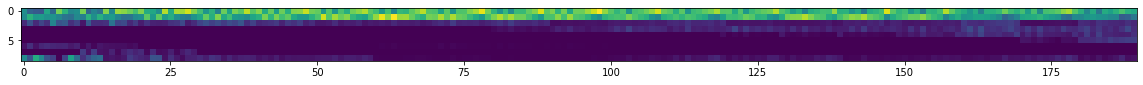

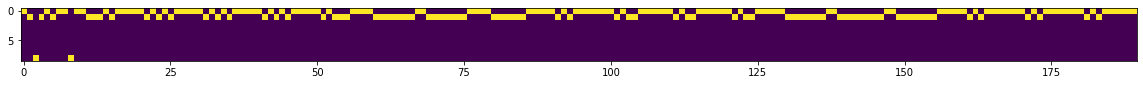

shape of K prior:  (1710, 1710)


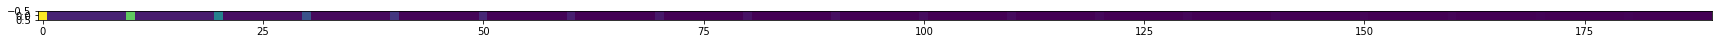

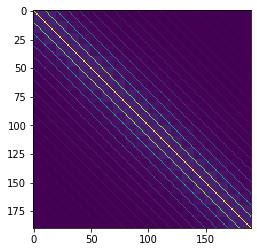

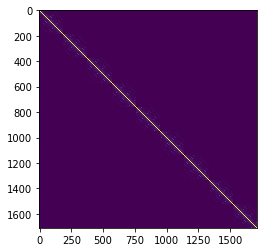

In [8]:
# we have inputs prior covariance matrix K and targets y

# the targets are just the true election results in our case
# it is a CxN vector which is 9(parties)x10(counties)x19(elections) in our case 

#y_values += 10 #test whether the zeros confuse the algorithm
y = y_values/y_values.sum(1).reshape(-1,1)
y = y.T
print("shape of y: ", y.shape) #we will keep it as a matrix for the calculation of the softmax

assert(np.allclose(np.sum(y.astype(float), axis=0) - 1, np.zeros(len(y[0]))))

plt.figure(figsize=(20,20))
plt.imshow(y.astype(float))
plt.show();

#test zone: have matrix with 1 for the maximum entry (i.e. the party that won the election) and 0 for all others
y_onehot = np.zeros_like(y)
y_onehot[y.argmax(0), np.arange(len(y[0]))] = 1

assert(np.allclose(np.sum(y_onehot.astype(float), axis=0) - 1, np.zeros(len(y[0]))))

plt.figure(figsize=(20,20))
plt.imshow(y_onehot.astype(float))
plt.show();


# the covariance matrix is a block diagonal matrix with K_1, ..., K_C as block entries. 
# for our purposes we don't have any different prior assumptions for either of the parties
# so K_1 = ... = K_C using the same kernel as for our large GP but without the party entries
n_GPC = n_regions * 19 #counties * elections

def k_SEK(x, x_, s=1, l=2):
    return(s*np.exp(-(x-x_)**2 / (2*l**2)))

def k_RQ(x, x_, s=1, l=10, a=0.1):
    return(s**2 * (1 + (x-x_)**2/(2*a*l**2)))**(-a)

def k_dirac_soft(x, x_, equal=1, unequal=0.01):
    if x == x_:
        return(equal)
    else:
        return(unequal)

X_GPC = np.zeros((len(T)*len(C), 2))

idx = 0
for t in T:
    for c in C:
        X_GPC[idx] = [t, c]
        idx += 1

K_C = np.zeros((n_GPC, n_GPC))
for i in range(n_GPC):
    for j in range(n_GPC):
        t_i = X_GPC[i,0]
        c_i = X_GPC[i,1]
        t_j = X_GPC[j,0]
        c_j = X_GPC[j,1]
        #K_C[i, j] = k_RQ(t_i, t_j, l=5, a=1) * k_dirac_soft(c_i, c_j, equal=1, unequal=0.1)
        K_C[i, j] = 1000 * k_RQ(t_i, t_j, l=5, a=1) * k_dirac_soft(c_i, c_j, equal=1, unequal=0.1)
        #K_C[i, j] = k_SEK(t_i, t_j, l=1) * k_dirac_soft(c_i, c_j)


K_GPC_prior = np.zeros((n_GPC * n_parties, n_GPC * n_parties))        
        
idx = 0
for _ in range(n_parties):
    K_GPC_prior[idx:idx+n_GPC, idx:idx+n_GPC] = K_C
    idx += n_GPC
    
print("shape of K prior: ", np.shape(K_GPC_prior))

#test 
plt.figure(figsize=(30,1))
plt.imshow(K_C[0].reshape(-1,1).T)
plt.show();

plt.imshow(K_C)
plt.show();

plt.imshow(K_GPC_prior)
plt.show();

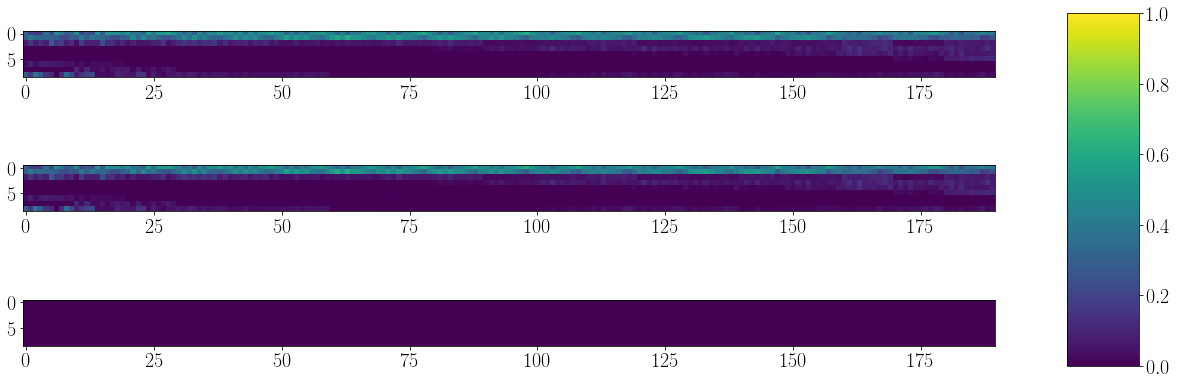

In [27]:
# initialization

# init f
#f = np.zeros_like(y) 
#f = np.random.normal(size=(np.shape(y)))
log_y = np.log(y.astype(float)+1e-8)  # init with the ground truth
f = log_y
f_sm = np.exp(f)/np.exp(f).sum(axis=0).reshape(1,-1)

# init convergencecriterium
convergence_criterium = False

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(20,7))

im = axs[0].imshow(f_sm.astype(float), vmin=0, vmax=1)
im = axs[1].imshow(y.astype(float), vmin=0, vmax=1)
im = axs[2].imshow(f_sm.astype(float) - y.astype(float), vmin=0, vmax=1)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.show();


In [28]:
# newton iteration
from numpy.random import randn, multivariate_normal
from numpy.linalg import cholesky, solve
from scipy.linalg import cho_solve, cho_factor
import time

t0 = time.time()
while convergence_criterium == False:
    
    # compute pi and PI from f: line 4
    f = f.reshape(n_parties, n_GPC).astype(float) #+ 10e-10 #mini nugget to prevent NaNs and inf
    f_prev = f
    pi = np.exp(f)/np.exp(f).sum(axis=0).reshape(1,-1)
    """
    plt.figure(figsize=(20,10))
    plt.title("pi reshaped")
    plt.imshow(pi, vmin = 0, vmax=1)
    plt.show();
    #"""
    assert(np.allclose(np.sum(pi, axis=0) - 1, np.zeros(len(pi[0]))))
    #print("pi: ", pi)
    PI = np.zeros((n_GPC*n_parties, n_GPC))
    idx = 0
    for p in range(n_parties):
        PI[idx:idx+n_GPC, :n_GPC] = np.diag(pi[p])
        idx += n_GPC
    
    """
    plt.figure(figsize=(20, 40))
    plt.imshow(PI)
    plt.show()
    #print([PI[i,i] for i in range(n_GPC)])
    #"""
    
    # Loop over classes: line 5
    E = np.zeros((n_GPC*n_parties, n_GPC*n_parties))
    Es = []
    idx = 0
    Zs = []
    for p in range(n_parties):
        D_sqrt = np.diag(np.sqrt(pi[p]))
        
        #cholesky: line 6
        L = cho_factor(1 * np.eye(n_GPC) + D_sqrt @ K_C @ D_sqrt)
        
        #compute E: line 7
        E_c = D_sqrt @ cho_solve(L, D_sqrt)
        E[idx:idx+n_GPC, idx:idx+n_GPC] = E_c
        idx += n_GPC
        Es.append(E_c)
        
        #compute z: line 8
        z_c = np.sum(np.log(np.diag(L[0])))
        Zs.append(z_c)
        
    """
    plt.figure(figsize=(20, 20))
    plt.imshow(E)
    plt.show()
    #"""
    
    # compute M: line 10
    M = cho_factor(np.sum(np.array(Es), axis=0))
    
    #compute b: line 11
    b = (np.diag(pi.reshape(-1)) - PI@PI.T) @ f.reshape(-1) + y.reshape(-1) - pi.reshape(-1)
    #b = (np.diag(pi.reshape(-1)) - PI@PI.T) @ f.reshape(-1) + y_onehot.reshape(-1) - pi.reshape(-1)
    """
    plt.figure(figsize=(20, 20))
    #plt.imshow((np.diag(pi.reshape(-1))))
    #plt.imshow(PI@PI.T)
    #plt.imshow((np.diag(pi.reshape(-1)) - PI@PI.T))
    plt.show()
    #"""
    """
    plt.figure(figsize=(20, 20))
    plt.title("b reshaped")
    plt.imshow(b.reshape((-1, n_GPC)).astype(float), vmin = 0, vmax=1)
    plt.show()
    #"""
    
    
    
    #compute c: line 12
    c = E @ K_GPC_prior @ b
    """
    plt.figure(figsize=(20, 20))
    plt.title("c reshaped")
    plt.imshow(c.reshape((-1, n_GPC)).astype(float), vmin = 0, vmax=1)
    plt.show()
    #"""
    
    #compute a: line 13
    R = np.stack([np.eye(n_GPC) for _ in range(n_parties)], axis=0).reshape(-1, n_GPC)
    """
    plt.figure(figsize=(20, 20))
    plt.imshow(R.astype(float))
    plt.show()
    #"""
    a = b - c + E @ R @ cho_solve(M, R.T @ c)
    """
    plt.figure(figsize=(20, 20))
    plt.title("a reshaped")
    plt.imshow(a.reshape((-1, n_GPC)).astype(float), vmin = 0, vmax=1)
    plt.show()
    #"""
    
    #compute new f: line 14
    f = K_GPC_prior @ a
    #f = K_GPC_prior @ b
    """
    plt.figure(figsize=(20, 20))
    plt.title("f reshaped")
    plt.imshow(f.reshape((-1, n_GPC)).astype(float), vmin = f.min(), vmax=f.max())
    plt.show()
    #"""
    
    #compute objective: line 15    
    objective = -1/2 * a.T @ f + y.reshape(-1).T @ f 
    #objective = -1/2 * a.T @ f + y_onehot.reshape(-1).T @ f 
    objective += np.sum(np.log(np.sum(np.exp(f.astype(float).reshape(n_parties, n_GPC)), axis=0)))
    print("objective: ", objective)
    
    #how good is f?
    f_hat = f.reshape(n_parties, n_GPC).astype(float) #+ 10e-10 #mini nugget to prevent NaNs and inf
    pi_hat = np.exp(f_hat)/np.exp(f_hat).sum(axis=0).reshape(1,-1)
    """
    plt.figure(figsize=(20, 20))
    plt.title("pi hat reshaped")
    plt.imshow(pi_hat.reshape((-1, n_GPC)).astype(float), vmin = 0, vmax=1)
    plt.show()
    #"""
    
    diff = np.sum(np.abs(f_prev - f.reshape(n_parties, n_GPC))) 
    print("difference of f_new and f: ", diff)
    if (diff <= 1e-8):
        convergence_criterium = True
        t1 = time.time()
        print("time to train: ", t1-t0)
    
    


objective:  847.7413664828211
difference of f_new and f:  14735.226709896375
objective:  1007.1653885903079
difference of f_new and f:  911.1352179271013
objective:  1151.7594634435331
difference of f_new and f:  781.8611072537036
objective:  1283.0972503132748
difference of f_new and f:  698.9399619895149
objective:  1391.5547065796973
difference of f_new and f:  582.4612988362194
objective:  1463.6684130449441
difference of f_new and f:  402.9357080358857
objective:  1493.6163569128628
difference of f_new and f:  171.44593672871267
objective:  1498.2170066028075
difference of f_new and f:  26.44303894222049
objective:  1498.3271164951989
difference of f_new and f:  0.6288660337293674
objective:  1498.3272012194493
difference of f_new and f:  0.0004855883127901765
objective:  1498.3272012191064
difference of f_new and f:  2.661640338252197e-09
time to train:  12.716010332107544


pi hat shape:  (9, 190)
pi hat:  [[0.30654252 0.29444669 0.07265662 ... 0.03095367 0.00382207 0.28920387]
 [0.19544194 0.394499   0.15795331 ... 0.08409817 0.00248668 0.16308724]
 [0.17579759 0.33260774 0.07483068 ... 0.03006475 0.00364211 0.38081427]
 ...
 [0.44118453 0.18191732 0.06404639 ... 0.00105795 0.00102744 0.06392934]
 [0.39302568 0.19500646 0.08464522 ... 0.00103438 0.00101706 0.02505022]
 [0.3724616  0.24638611 0.06855315 ... 0.00112737 0.00102212 0.0316865 ]]
error:  [[-0.00036518082644065863 -0.0012287570382317203 -0.0013894143806243014
  ... -0.0003441109732428907 0.0038220677467422706 -0.002869157850261539]
 [-0.0020147729110404633 -0.0018513031056272 -0.0003900024018049786 ...
  -0.000663556538381127 0.0024866805363870387 -7.030690989673349e-07]
 [-0.0005830282817386734 -0.0017079715110775995 -7.830004827365233e-05
  ... -0.0008719898127244781 0.0036421122599193142 -0.0026436706619194505]
 ...
 [-0.0004357009851936322 0.0006286037360340724 -0.0007805479089052214 ...
  

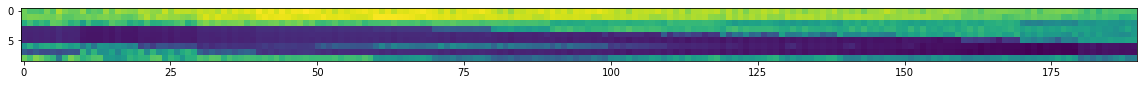

In [11]:
print("pi hat shape: ", np.shape(pi_hat))
print("pi hat: ", pi_hat.T)
print("error: ", (pi_hat - y).T)
print("error sum: ", np.sum(np.abs(pi_hat - y)))

plt.figure(figsize=(20,10))
plt.imshow(f_hat);

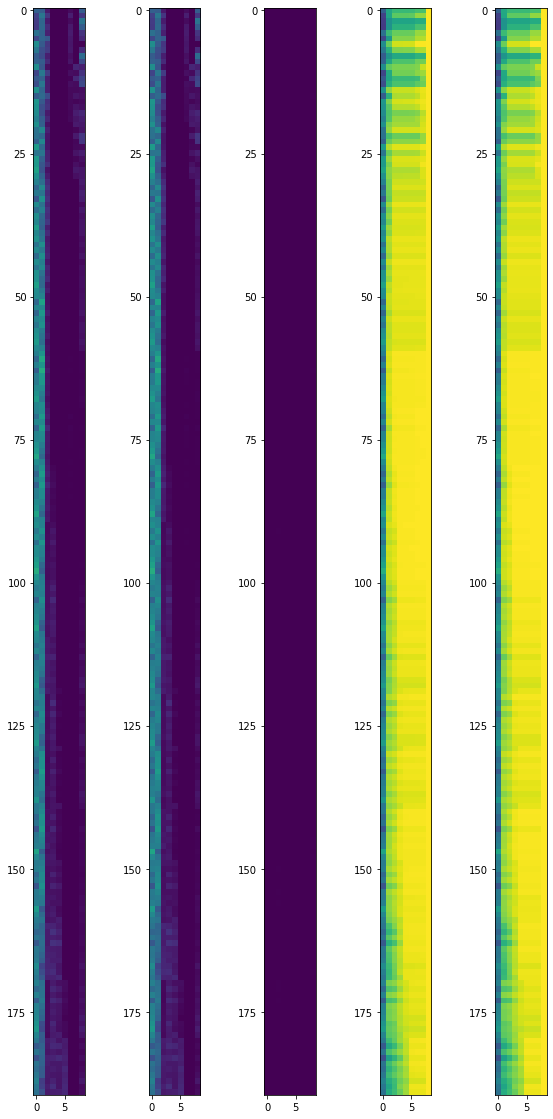

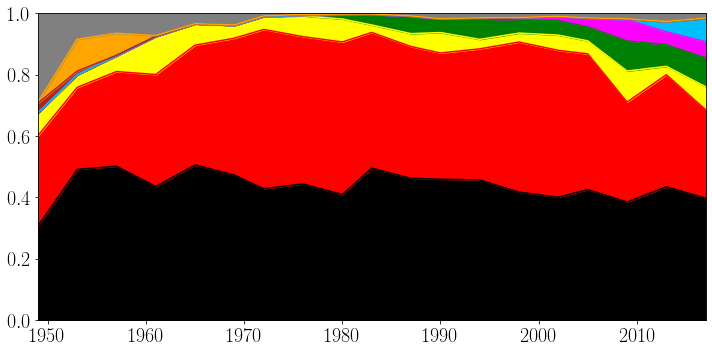

In [12]:
# plot a prediction

pi_hat_pred = pi_hat.T

#plt.figure(figsize=(10,20))
#plt.imshow(pi_hat_pred);

pi_hat_pred_cum = np.cumsum(pi_hat_pred, 1)

fix, ax = plt.subplots(1, 5, figsize=(10, 20))
ax[0].imshow(pi_hat_pred, vmin=0, vmax=1)
ax[1].imshow(y.astype(float).T, vmin=0, vmax=1)
ax[2].imshow(pi_hat_pred - y.astype(float).T, vmin=0, vmax=1)
ax[3].imshow(pi_hat_pred_cum, vmin=0, vmax=1)
ax[4].imshow(np.cumsum(y.astype(float).T, 1), vmin=0, vmax=1)
plt.show()

pi_hat_pred_cum = pi_hat_pred_cum.reshape((-1, n_regions*n_parties))
pi_hat_pred_cum_ger = pi_hat_pred_cum[:, 9*n_parties:10*n_parties]
pi_hat_pred_cum_SH = pi_hat_pred_cum[:, 0:1*n_parties]

plot_elections_cum(pi_hat_pred_cum_SH, x=years, parties=parties, party_colors=party_colors, save=False, filename='GPC_ger.pdf', legend=False)

K_C_star shape: (190, 680)


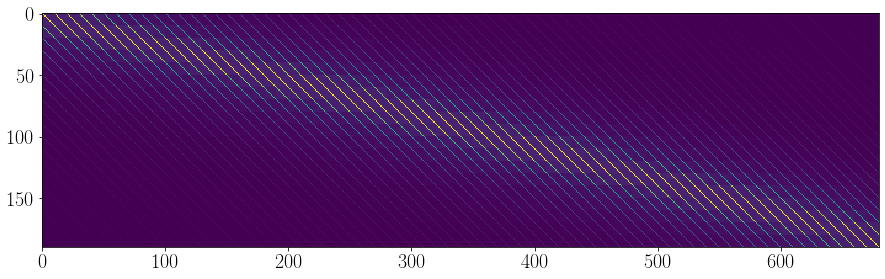

K_C_star_XX shape: (680, 680)


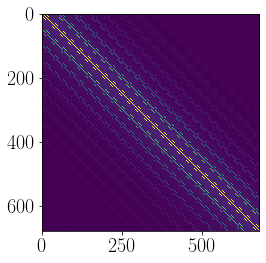

In [13]:
#### create the input data for the GPC predictions

T_x = np.arange(1949, 2017)
C_x = np.arange(1, n_regions +1)

n_GPC_pred = len(T_x)*len(C_x)
X_GPC_pred = np.zeros((n_GPC_pred, 2))

idx = 0
for t in T_x:
    for c in C_x:
        X_GPC_pred[idx] = [t, c]
        idx += 1

K_C_star = np.zeros((n_GPC, n_GPC_pred))
for i in range(n_GPC):
    for j in range(n_GPC_pred):
        t_i = X_GPC[i,0]
        c_i = X_GPC[i,1]
        t_j = X_GPC_pred[j,0]
        c_j = X_GPC_pred[j,1]
        K_C_star[i, j] = 1000 * k_RQ(t_i, t_j, l=5, a=1) * k_dirac_soft(c_i, c_j, equal=1, unequal=0.1)
        #K_C_star[i, j] = k_SEK(t_i, t_j, l=5) * k_dirac_soft(c_i, c_j, equal=1, unequal=0.1)
        
print("K_C_star shape:", np.shape(K_C_star))
plt.figure(figsize=(15, 15))
plt.imshow(K_C_star)
plt.show();

K_C_star_XX = np.zeros((n_GPC_pred, n_GPC_pred))
for i in range(n_GPC_pred):
    for j in range(n_GPC_pred):
        t_i = X_GPC_pred[i,0]
        c_i = X_GPC_pred[i,1]
        t_j = X_GPC_pred[j,0]
        c_j = X_GPC_pred[j,1]
        K_C_star_XX[i, j] = 1000 * k_RQ(t_i, t_j, l=5, a=1) * k_dirac_soft(c_i, c_j, equal=1, unequal=0.1)
        
print("K_C_star_XX shape:", np.shape(K_C_star_XX))
plt.imshow(K_C_star_XX)
plt.show();

# we want to draw S = 100 samples from the posterior and apply the softmax
S = 100

In [14]:
#f_hat = y

def is_pos_def(x):
    eig = np.linalg.eigvals(x)
    pd = np.all(eig > 0)
    if not pd:
        raise(ValueError("matrix is not positive definite! Matrix: {}; Eigenvalues: {}".format(x, eig)))
    else:
        print("Matrix is positive definite; minimum eigenvalue: {}".format(eig.min()))
        return(True)

In [15]:
#### do the prediction algorithm for multiclass GP classification as detailed in algorithm 3.4 in the GP book

t0_pred = time.time()
# compute pi and PI from f_hat: line 2
f_hat = f_hat.reshape(n_parties, n_GPC).astype(float) 
pi = np.exp(f_hat)/np.exp(f_hat).sum(axis=0).reshape(1,-1)
assert(np.allclose(np.sum(pi, axis=0) - 1, np.zeros(len(pi[0]))))
#print("pi: ", pi)
PI = np.zeros((n_GPC*n_parties, n_GPC))
idx = 0
for p in range(n_parties):
    PI[idx:idx+n_GPC, :n_GPC] = np.diag(pi[p])
    idx += n_GPC


# Loop over classes: line 5
E = np.zeros((n_GPC*n_parties, n_GPC*n_parties))
Es = []
idx = 0
for p in range(n_parties):
    D_sqrt = np.diag(np.sqrt(pi[p]))

    #cholesky: line 4
    L = cho_factor(np.eye(n_GPC) + D_sqrt @ K_C @ D_sqrt)

    #compute E: line 5
    E_c = D_sqrt @ cho_solve(L, D_sqrt)
    E[idx:idx+n_GPC, idx:idx+n_GPC] = E_c
    idx += n_GPC
    Es.append(E_c)

# compute M: line 7
M = cho_factor(np.sum(np.array(Es), axis=0))
R = np.stack([np.eye(n_GPC_pred) for _ in range(n_parties)], axis=0).reshape(-1, n_GPC_pred)
"""
plt.figure(figsize=(20, 20))
plt.title("R")
plt.imshow(R.astype(float))
plt.show()
#"""

# Loop over classes: line 8
Sigma = np.zeros((n_parties * n_GPC_pred, n_parties * n_GPC_pred))
mu = np.zeros((n_parties * n_GPC_pred))

for p in range(n_parties):
    mu_c_star = (y[p] - pi[p]).T @ K_C_star
    mu[p*n_GPC_pred:(p+1)*n_GPC_pred] = mu_c_star
    b = Es[p] @ K_C_star
    c = Es[p] @ (R.T @ cho_solve(M, (b @ R.T)).T).T
    
    #loop over classes: line 12
    for p_ in range(n_parties):
        Sigma_cc_ = c.T @ K_C_star + np.eye(n_GPC_pred) * 0.0001
        Sigma[p*n_GPC_pred:(p+1)*n_GPC_pred, p_*n_GPC_pred:(p_+1)*n_GPC_pred] = Sigma_cc_
        
    Sigma[p*n_GPC_pred:(p+1)*n_GPC_pred, p*n_GPC_pred:(p+1)*n_GPC_pred] += K_C_star_XX - b.T @ K_C_star
    idx += n_GPC_pred


"""
plt.figure(figsize=(20,20))
plt.imshow(Sigma)
plt.title("Sigma")
plt.show();
#"""


'\nplt.figure(figsize=(20,20))\nplt.imshow(Sigma)\nplt.title("Sigma")\nplt.show();\n#'

In [16]:
#IMPORTANT: the calculation of Sigma has a bug. I can't find where it comes from 
# and calculating Sigma per sample doesn't help either. 
# However, it doesn't really matter since we only want to time the process anyways

# init pi for MC-loop: line 17
pi_star = np.zeros_like(pi).reshape(n_parties, n_GPC).astype(float)


print("loops done, starting MC")
Sigma = 0.001 * np.eye(n_parties * n_GPC_pred)

# MC-loop: line 18
f_star = multivariate_normal(
    mu, Sigma, size=S
)
#"""


loops done, starting MC


In [17]:
print(np.shape(f_star))

(100, 6120)


In [18]:
f_star = f_star.reshape(S, n_parties, n_GPC_pred).astype(float)
f_star_sm = np.exp(f_star)/np.exp(f_star).sum(1).reshape(S, 1, -1)
f_star_sm_mean = f_star_sm.mean(0)

t1_pred = time.time()
print("prediction time: ", t1_pred - t0_pred)
print(np.shape(f_star_sm_mean))
print(f_star_sm_mean[:,0])

prediction time:  123.02689981460571
(9, 680)
[0.30624276 0.29547474 0.07262882 0.00081433 0.00078614 0.00077565
 0.03093776 0.00384099 0.28849882]


In [19]:
#f_pred = np.flip(f_star_sm_mean.T, 1)
f_pred = f_star_sm_mean.T
f_pred_cum = np.cumsum(f_pred, 1).reshape((-1, n_regions*n_parties))
f_pred_cum_ger = f_pred_cum[:, 9*n_parties:10*n_parties]
f_pred_cum_SH = f_pred_cum[:, 0:1*n_parties]
f_pred_cum_HH = f_pred_cum[:, 1*n_parties:2*n_parties]
f_pred_cum_NS = f_pred_cum[:, 2*n_parties:3*n_parties]

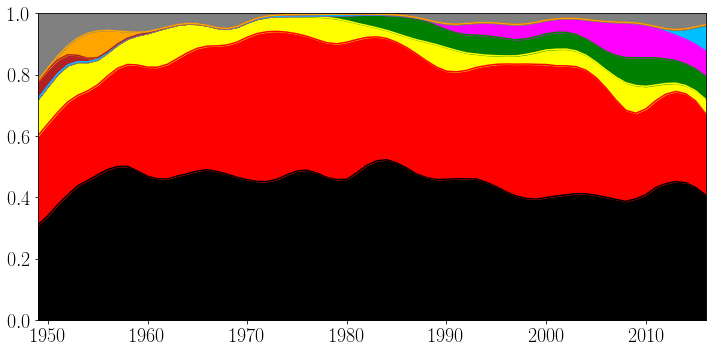

In [20]:
plot_elections_cum(f_pred_cum_ger, x=T_x, parties=parties, party_colors=party_colors, save=False, filename='GPC_ger.pdf', legend=False)

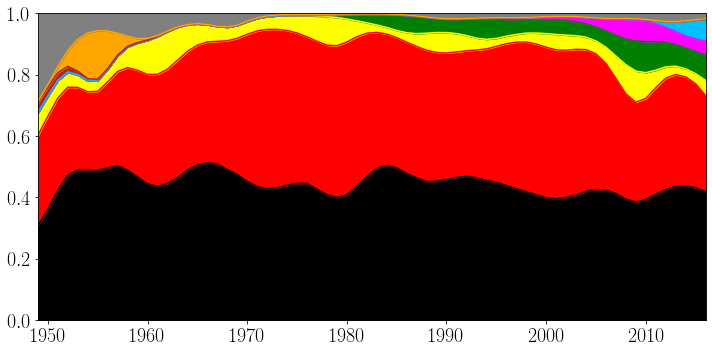

In [21]:
plot_elections_cum(f_pred_cum_SH, x=T_x, parties=parties, party_colors=party_colors, save=False, filename='GPC_ger.pdf', legend=False)

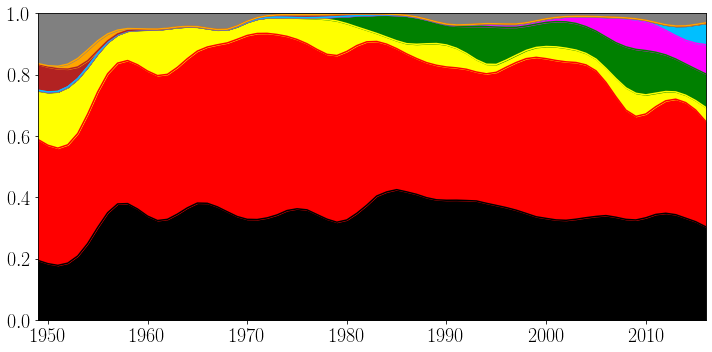

In [22]:
plot_elections_cum(f_pred_cum_HH, x=T_x, parties=parties, party_colors=party_colors, save=False, filename='GPC_ger.pdf', legend=False)

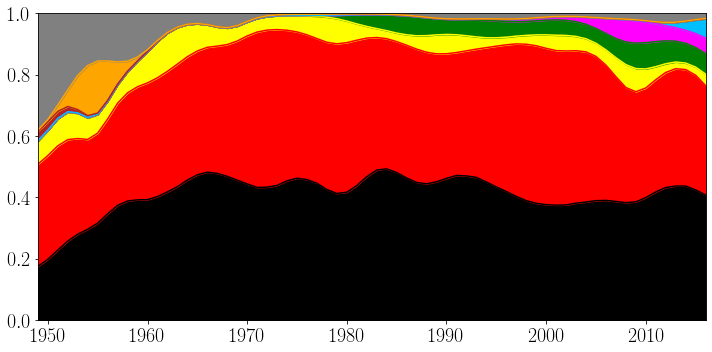

In [23]:
plot_elections_cum(f_pred_cum_NS, x=T_x, parties=parties, party_colors=party_colors, save=False, filename='GPC_ger.pdf', legend=False)